### PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm

In [ ]:
USArrests = sm.datasets.get_rdataset("USArrests","datasets")

In [ ]:
datos = USArrests.data

In [ ]:
datos.sample(5, random_state=1000)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Georgia,17.4,211,60,25.8
Ohio,7.3,120,75,21.4
Florida,15.4,335,80,31.9
Texas,12.7,201,80,25.5
New Jersey,7.4,159,89,18.8


In [ ]:
pca_pipe = make_pipeline(StandardScaler() , PCA())
pca_pipe.fit(datos)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
modelo_pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [ ]:
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns=['PC1', 'PC2','PC3','PC4'],
    index = datos.index
)

In [ ]:
proyecciones

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


In [ ]:
proyecciones = np.dot(modelo_pca.components_,scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index=['PC1', 'PC2','PC3','PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)

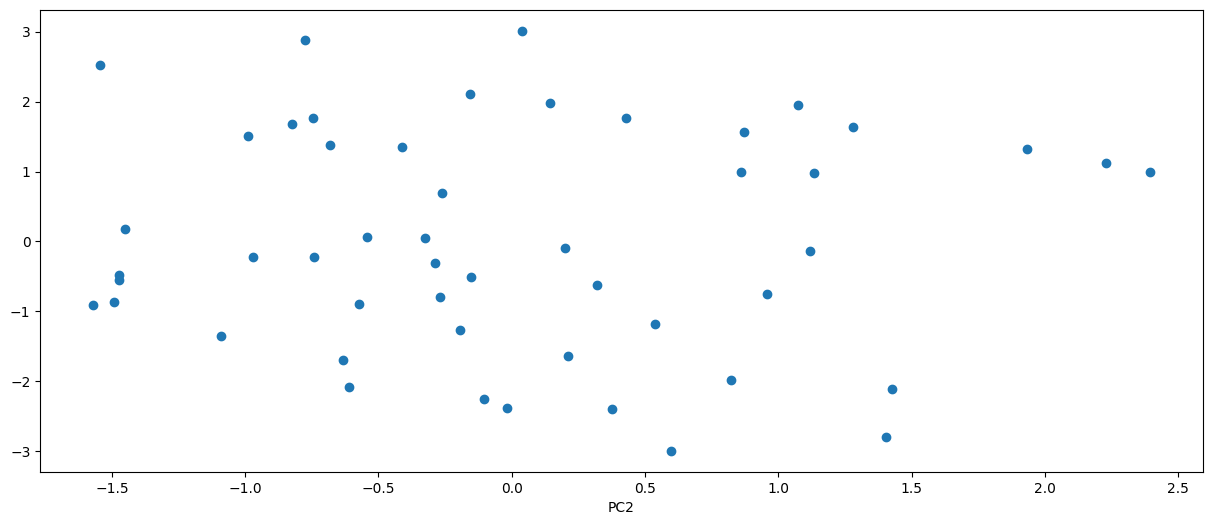

In [ ]:
plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
ax = proyecciones.set_index('PC2')['PC1'].plot(style='o')

In [ ]:
modelo_pca.components_[0]

array([0.53589947, 0.58318363, 0.27819087, 0.54343209])

### K-Means

In [4]:
from sklearn.datasets import make_blobs, make_moons

In [5]:
X1,y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=10)
X2,y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=10)
X3,y3 = make_moons(n_samples=1000, noise=0.05, random_state=10)

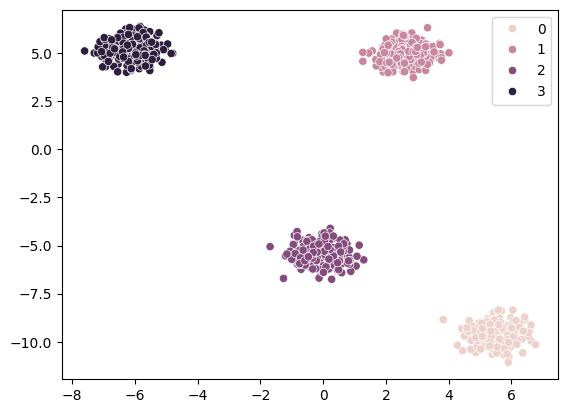

In [6]:
sns.scatterplot(x=X1[:,0], y = X1[:,1], hue= y1)
plt.show()

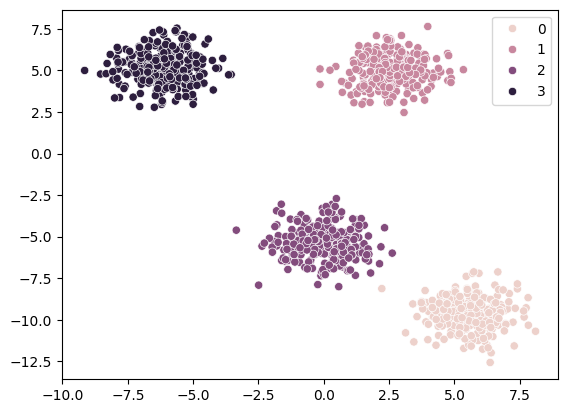

In [7]:
sns.scatterplot(x=X2[:,0], y = X2[:,1], hue= y2)
plt.show()

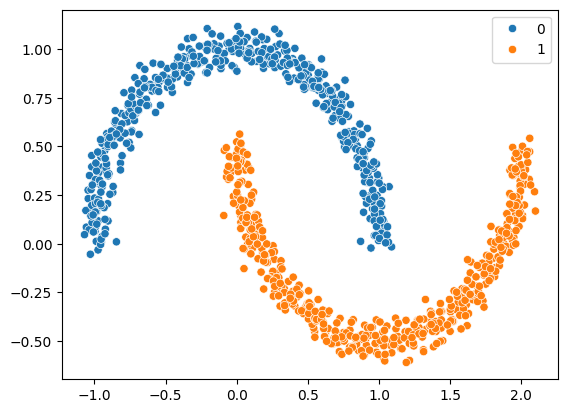

In [8]:
sns.scatterplot(x=X3[:,0], y = X3[:,1], hue= y3)
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [77]:
kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_3 = KMeans(n_clusters=4, random_state=0)

In [78]:
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [15]:
etiquetas_1 = kmeans_1.labels_
etiquetas_1

array([1, 0, 0, 1, 2, 2, 3, 2, 1, 0, 2, 1, 0, 3, 0, 3, 0, 0, 1, 3, 3, 2,
       3, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 3, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 3, 0, 2, 2, 1, 2, 1, 2, 3, 1, 0, 0, 1, 2, 1, 2, 3, 0, 0, 0,
       1, 0, 1, 2, 1, 3, 2, 0, 3, 1, 3, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 3,
       3, 0, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 2, 2, 2, 3, 0, 2, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 1, 1, 0, 3, 2,
       0, 2, 3, 3, 0, 2, 0, 3, 0, 2, 0, 0, 3, 0, 2, 1, 3, 1, 2, 0, 2, 0,
       0, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 1, 0, 2, 0, 3, 0, 0, 1, 3, 3,
       2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 3,
       1, 1, 3, 1, 0, 2, 3, 0, 2, 1, 0, 0, 1, 1, 3, 2, 2, 2, 0, 0, 1, 2,
       2, 0, 1, 1, 2, 1, 2, 3, 0, 1, 1, 2, 3, 2, 2, 1, 0, 2, 1, 3, 0, 1,
       0, 3, 1, 3, 3, 0, 0, 3, 3, 2, 1, 3, 0, 2, 3, 1, 0, 2, 3, 0, 3, 3,
       1, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 3, 3, 2, 3, 1, 3, 3,
       3, 2, 3, 3, 1, 3, 0, 0, 2, 2, 2, 3, 2, 0, 1,

In [16]:
np.unique(etiquetas_1)

array([0, 1, 2, 3], dtype=int32)

In [17]:
centros_1 = kmeans_1.cluster_centers_
centros_1

array([[-6.07091133,  5.17741771],
       [ 5.48000733, -9.60010205],
       [-0.03819566, -5.46170435],
       [ 2.62361922,  4.96561618]])

In [18]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_

In [79]:
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

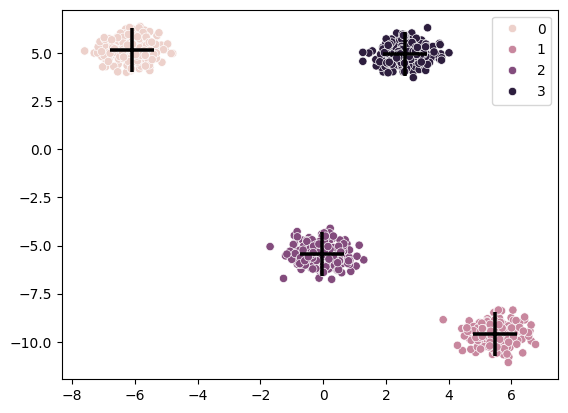

In [21]:
sns.scatterplot(x=X1[:, 0], y= X1[:, -1], hue = etiquetas_1)
sns.scatterplot(x= centros_1[:,0], y= centros_1[:,1], color="black", marker="+", s=1000)
plt.show()

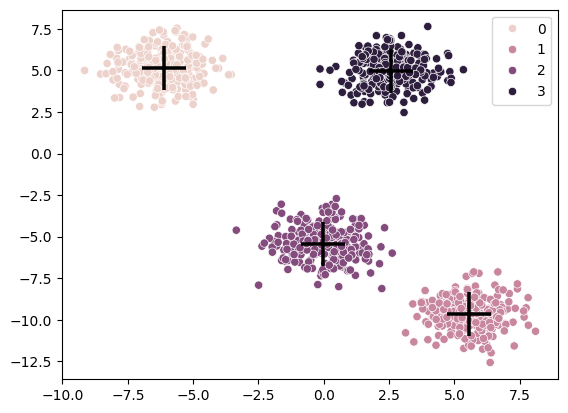

In [22]:
sns.scatterplot(x=X2[:, 0], y= X2[:, -1], hue = etiquetas_2)
sns.scatterplot(x= centros_2[:,0], y= centros_2[:,1], color="black", marker="+", s=1000)
plt.show()

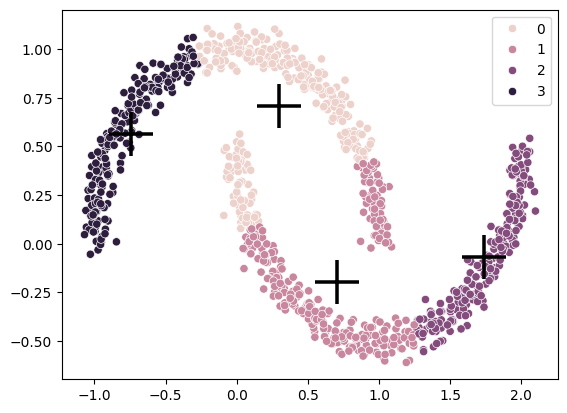

In [80]:
sns.scatterplot(x=X3[:, 0], y= X3[:, -1], hue = etiquetas_3)
sns.scatterplot(x= centros_3[:,0], y= centros_3[:,1], color="black", marker="+", s=1000)
plt.show()

In [51]:
kmeans_1_mal = KMeans(2).fit(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
etiquetas_1_mal = kmeans_1_mal.labels_
centros_1_mal = kmeans_1_mal.cluster_centers_

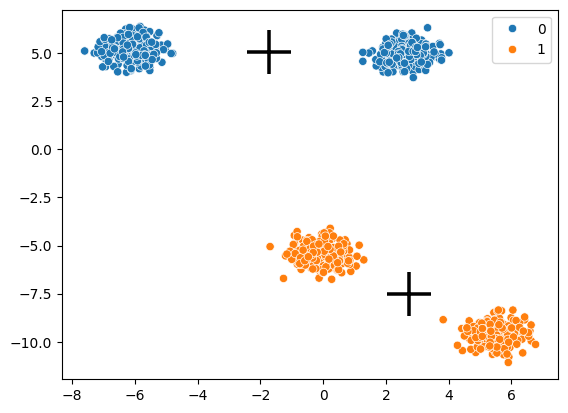

In [53]:
sns.scatterplot(x=X1[:, 0], y= X1[:, -1], hue = etiquetas_1_mal)
sns.scatterplot(x= centros_1_mal[:,0], y= centros_1_mal[:,1], color="black", marker="+", s=1000)
plt.show()

In [55]:
K = np.arange(2,13)

In [67]:
lista_inercias = []

In [68]:
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X3)
  inercia = km.inertia_
  lista_inercias.append(inercia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

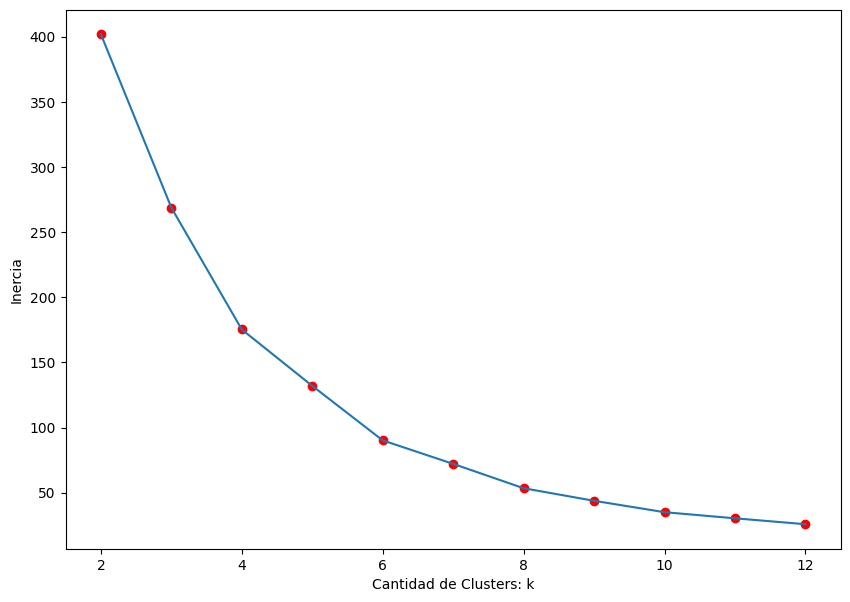

In [69]:
plt.figure(figsize = (10,7))
plt.plot(K, lista_inercias)
plt.scatter(K, lista_inercias,c="r")
plt.xlabel("Cantidad de Clusters: k")
plt.ylabel("Inercia")
plt.show()

In [60]:
from sklearn.metrics import silhouette_score

In [70]:
lista_sil = []

In [71]:
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X3)
  etiquetas = km.labels_
  valor_medio_sil = silhouette_score(X3, etiquetas)
  lista_sil.append(valor_medio_sil)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

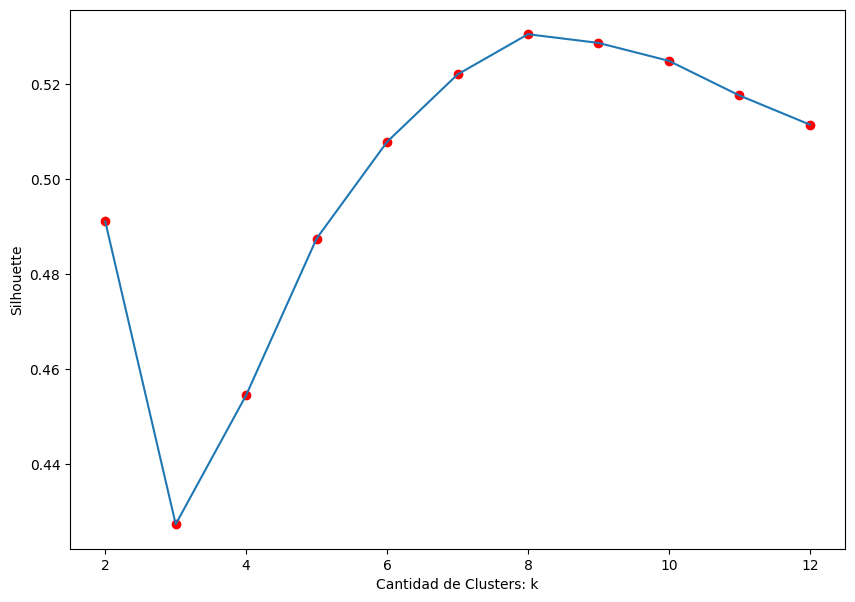

In [72]:
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil)
plt.scatter(K, lista_sil,c="r")
plt.xlabel("Cantidad de Clusters: k")
plt.ylabel("Silhouette")
plt.show()

In [81]:
from sklearn.cluster import DBSCAN

In [90]:
db_3 = DBSCAN(eps=0.2, min_samples=10)

In [91]:
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=10)

In [93]:
db_3.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [94]:
np.unique(db_3.labels_)

array([0, 1])

In [95]:
labels_3 = db_3.labels_

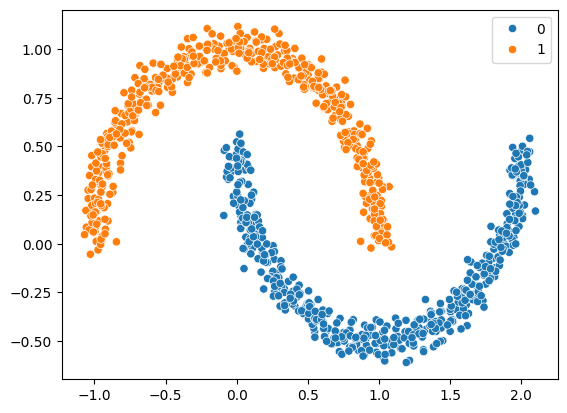

In [96]:
sns.scatterplot(x=X3[:, 0], y= X3[:, -1], hue = labels_3)
plt.show()